# BEFORE RUNNING CODE

All folders, images, etc. will be pulled from the following folder located in this [Google Drive](https://drive.google.com/drive/folders/1eg50PXrRR28LoU2D_ZyXfsZQNtzlvVT3?usp=drive_link). For access issues, please email ronakkb2@illinois.edu. The folder CS598 is referenced in the following code for ease of use. In the event that code is cut-off from the PDF or that there is ambiguity on implementation/etc., our shared Google Colab for this project is included [here](https://colab.research.google.com/drive/1gzgoP_ny7y_9vVdzDMGcNY9SKq8s4LZF?usp=sharing).

## GITHUB LINK (REQUESTED ON PIAZZA)

Here is the [public Github link](https://github.com/rbhatia1997/Team_87_Project_Draft/tree/main/CS598-Data) to the Data/referenced work.

In [44]:
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction (2 pts)

The original GitHub paper, referencing a Kaggle dataset and code from the University of California, Irvine (UCI), focuses on identifying risk factors for cervical cancer to aid in early diagnosis and preventive care.

Cervical cancer, mainly caused by certain strains of the Human Papillomavirus (HPV), can lead to high mortality rates if not diagnosed and treated early. Despite the body's immune system often preventing HPV from causing harm, the virus can remain dormant and potentially lead to cervical cell cancer. Screening tests and vaccinations have significantly reduced cervical cancer mortality rates, for instance, by 74% in the U.S. between 1955 and 1992 through the use of the Pap test (Paria).

The UCI dataset highlights various risk factors, including age, HPV infection, socioeconomic challenges, smoking, oral contraceptive use, the use of the DES drug (1938-1971), and a weakened immune system. Cervical cancer, the most preventable type of cancer, still presents about 11,000 new cases annually in the U.S., leading to approximately 4,000 deaths nationally and 300,000 globally (Mayo Clinic). This paper and models illustrate that there are unique risk factors for cervical cancer that can be used in crucial preventative care applications.

Specifically addressing questions in the template:

*   Background of the problem
  * See above. TL;DR: cervical cancer risk identification for early detection.
  * Type of problem?
      * Disease prediction (i.e., cervical cancer).
  * Importance / Meaning of Solving the Problem?
      * Trying to prevent or detect sooner the 11,000 new cases of cervical cancer in the United States (the most preventable type of cancer) that cause ~4,000 deaths nationally and 300k deaths globally.
  * What is the difficulty of the problem?
      * The difficulty largely lies in the following factors: (1) data availability; (2) degree of model accuracy; (3) resources and ability to provide care to the community. In terms of the logistics of running this model / etc., it's relatively easier due to the fact that most of the work can be done in a Google colab.  
  * State of the Art Methods / Efficacy
      * There are four methods tested for cervical cancer classification/prediction: logistic regression, random forest classifier, k-nearest neighbors classifier, and a support vector classifier.
      * The efficacy is explained by the accuracy, precision, recall, and F1 scores for each of the models. Random Forest does the worst of the four with Logistic Regression and Support Vector Classifiers doing the best (around 98% precision, accuracy, and F1 score for both).
*   Paper explanation
  * What did the paper propose?
      * The paper proposes that 12 out of the 35 components that could explain cervical cancer accounts for 99% of the data variance. It proposes that using one of four classification methods can help identify cervical cancer given certain information about a patient.
  * What are the innovations of this method?
      * The paper provides a machine learning approach to cervical cancer classification, which is incredibly important because these symptoms - especially in early stages - can be mistaken for another type of less serious illness and the actual test administered by healthcare professionals may give the wrong diagnosis (Mayo Clinic). Given that the 5-year surival rate is 92% for early detection, this method could provide doctors and healthcare providers with a useful tool to identify potential cervical cancer patients at risk.
  * How well does the proposed method work (in its own metrics)
      * Logistic Regression: ~98% across the board for accuracy, recall, precision, and F1 score.
      * Random Forest: ~98% across the board for accuracy, recall, precision, and F1 score.
      * K-Neighbors Classifier: ~97% across the board for accuracy, recall, precision, and F1 score.
      * Support Vector Classifier: ~98% across the board for accuracy, recall, precision, and F1 score.
  * What is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem).
      * This paper does two things of significance: (1) provides a machine learning to a previously manual process of cervical cancer diagnosis / detection / risk identification and (2) provides the justification and rationale behind which risk factors are most contributing to cervical cancer diagnosis.


# Scope of Reproducibility (2 pts):

## Hypothesis

According to the Piazza post, the hypothesis is the “original claim” of the paper. In our case, the hypothesis is that cervical cancer is mostly caused by strains of HPV (human papillomavirus).

These strains are closely correlated with the following risk factors:
- (1) many sexual partners (i.e., greater number of sexual partners == greater chance of acquiring HPV)
- (2) early sexual activity (i.e., risk of HPV)
- (3) STIs (i.e., other STIs increase risk of HPV)
- (4) weakened immune system (i.e., more likely to develop cervical cancer and/or impact from HPV)
- (5) smoking (i.e., association with squamous cell cervical cancer)
- (6) exposure to miscarriage prevention drugs (i.e., DES in the 1950s, which is a now discontinued drug that increased risk to clear cell adenocarcinoma).

There are some key insights gained from doing preliminary data analysis of the 35 features of the original dataset.
- (1) Sexual partners remain consistent throughout differing age ranges. We notice that there is a correlation coefficient close to zero [~0.02%] (Ayad) that indicates that the # of sexual partners is not linearly correlated to respective diagnoses.
    - A majority of patients do not have STDs in the data and aren't diagnosed w/ cancer and/or HPV. HPV can be sexually transmitted and non-sexually acquired.
- (2) HPV diagnosis and Cervical cancer diagnosis have a correlation of approximately ~89% (Ayad).
- (3) Women in their 30s have the highest prevalence of cervical cancer and HPV, followed by women in their 20s (Ayad). This is shown in Figure #3.
- (4) Contraceptive use (> 5 years) increase risk of cervical cancer than women who haven't used oral contraceptives (Ayad);

In this project, we will use 12 out of 35 components in the dataset because they explain 99% of the variance of the data. This is shown in Figure #1 below. As evidenced in the paper and what we hope to reproduce is that we can create a very accurate (i.e., above 97% accuracy, precision, recall, and F1 score) machine learning classifier for identifying cervical cancer patients at risk. The results that we anticipate to see / ultimately replicate are shown in Figure #2 below.


Mounted at /content/gdrive


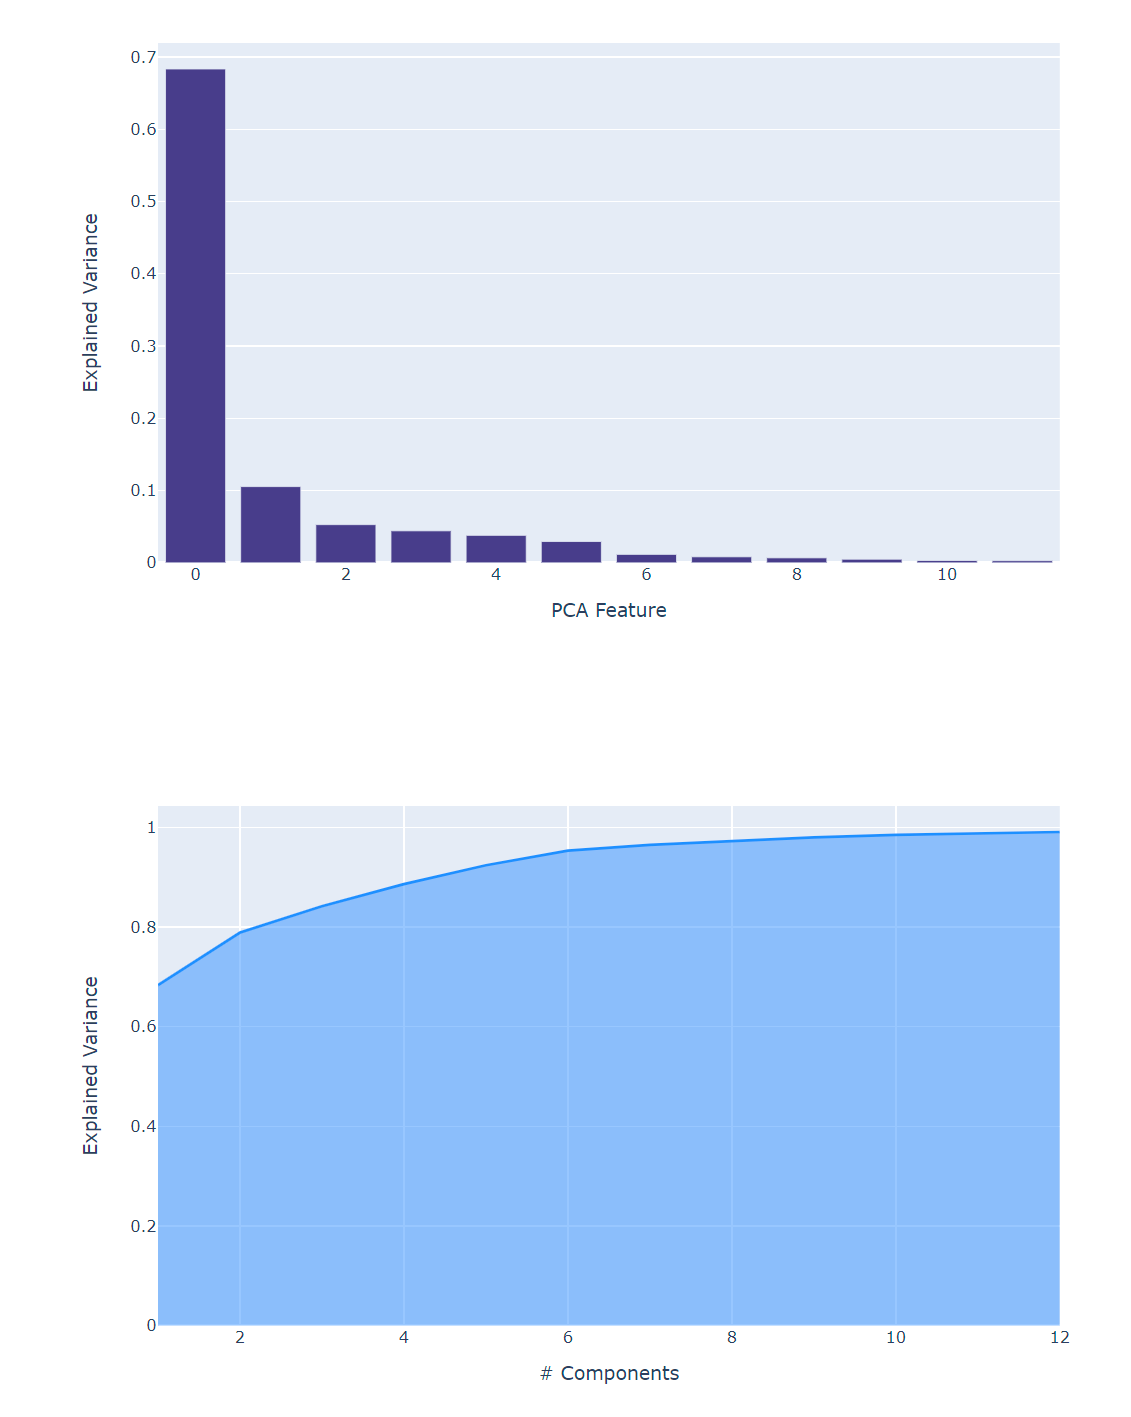

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

# Define directory to workspace and data
img_dir = '/content/gdrive/My Drive/CS598-Data/Reference Images/Figure_1.PNG'

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image, HTML

img = cv2.imread(img_dir)
if img is not None:
    display(HTML("<style> .title {color: red; font-family: Arial, sans-serif; font-size: 20px;}</style><div class='title'>Figure #1</div>"))
    cv2_imshow(img)
else:
    print("Failed to load image. Please check the image path.")


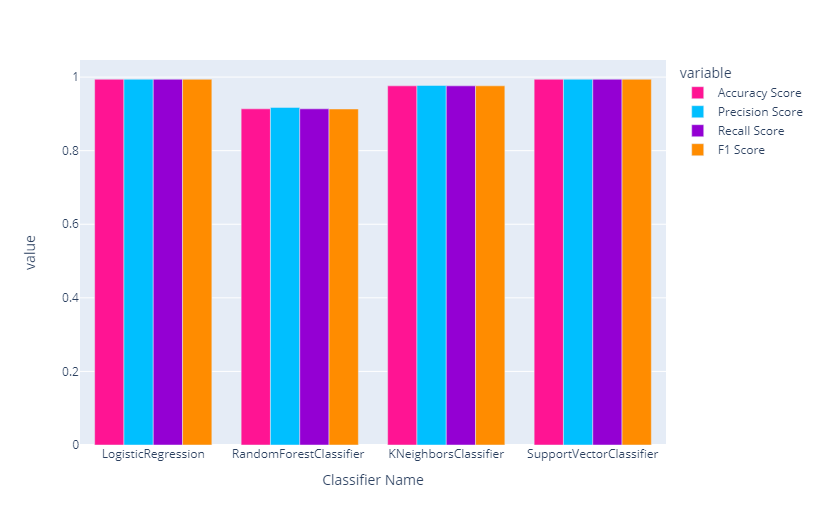

In [3]:
# Define directory to workspace and data
img_dir = '/content/gdrive/My Drive/CS598-Data/Reference Images/Figure_2.png'

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image, HTML

img = cv2.imread(img_dir)
if img is not None:
    display(HTML("<style> .title {color: red; font-family: Arial, sans-serif; font-size: 20px;}</style><div class='title'>Figure #2</div>"))
    cv2_imshow(img)
else:
    print("Failed to load image. Please check the image path.")


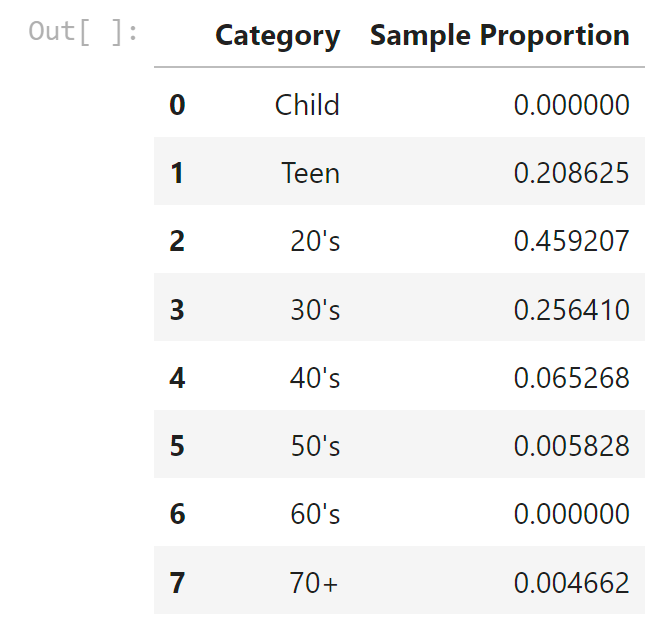

In [4]:
# Define directory to workspace and data
img_dir = '/content/gdrive/My Drive/CS598-Data/Reference Images/Figure_3.PNG'

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image, HTML

img = cv2.imread(img_dir)
if img is not None:
    display(HTML("<style> .title {color: red; font-family: Arial, sans-serif; font-size: 20px;}</style><div class='title'>Figure #3</div>"))
    cv2_imshow(img)
else:
    print("Failed to load image. Please check the image path.")


## Ablations

To summarize the above, we have two hypotheses: (1) 12 out of the 35 characteristics in the identified cervical cancer risk features explains a majority (i.e., 99%) of the data variance; (2) we can build machine learning classifiers that accurately determine the risk of cervical cancer based on a certain patient features and risk factors/behaviors.

We will also reproduce the ablation studies conducted in the original Github paper, which we will do by adding random noise / variables to the dataset to test robustness. These additions will be to the risk factor dataframe used in training the models to evaluate the model's performance despite the inclusion of irrelevant or noisy features, testing model generalizability.

To understand the contribution of each feature to a model's predction for a given dataset, we plan to employ at least two of the local explanation methods presented in the paper (i.e., local surrogates, Kernel SHHAP, Sampling SHHAP, LIME, etc.) and visualize this data to elucidate which features are most influential in a model's decision-making process for an individual prediction. In other words, this provides yet another way to validate our hypotheses by showing if our identified features in the dataset do a good job of capturing cervical cancer risk. This and the feature ranking part mentioned below are in the Results section.

We will follow the paper's guidance to determine any discrepancies between ranking mechanisms (ex., through overlap of top features considered important by the different ranking mechanisms and distinguishing between methods that include feature order and those that don't). We will also test different ways of balancing the classes for model training outside of age-split, which is what the original referenced code does, and pick the one that prevents overfitting the best. This will be shown in the preprocessing section(s) below.

# Methodology

As mentioned in the "before running code" note, the input data as well as XAI-related data used in ablations are referenced/located in the following [Google Drive](https://drive.google.com/drive/folders/1eg50PXrRR28LoU2D_ZyXfsZQNtzlvVT3?usp=sharing) for ease of access/reference.

As mentioned in the project draft, methodology is the core of the project, consisting of "run-able codes with necessary annotations to show the experiment you executed for testing the hypotheses." Please note that the ablations and XAI work was included under the "Results" section.

As a reminder, we have two hypotheses: (1) 12 out of the 35 characteristics in the identified cervical cancer risk features explains a majority (i.e., 99%) of the data variance; (2) we can build machine learning classifiers that accurately determine the risk of cervical cancer based on a certain patient features and risk factors/behaviors.

The methodology contains two subsections **data** and **model** in our paper reproduction. In the **data** section, we show how we:

- (1) Pull the input data (which was present in the original Kaggle UCI database).
- (2) How we preprocess the data (referencing both the Kaggle competition page as well as the follow-up paper by Ayad).
- (3) How certain features are correlated with cervical cancer risk.
- (4) How we balanced the classes (note: the original dataset has imbalanced classes: 2.1% of the data is classified as cancer vs. 97.9% classified as non-cancer [Kaggle]).

In the model section, we show how we:

- (1) Load and split the pre-processed data into features (X) and target (Y), representing cervical cancer risk / detection, and into training and test sets.
- (2) Initiate classifiers (i.e., Logistic regression, random forest, K-nearest Neighbors, Support Vector Machine, and Multilayer perceptron (MLP)).
- (3) Define a parameter grid and run hyperparameter tuning via GridSearchCV for logistic regression, K-nearest Neighbors, and Support Vector Machine.
- (4) Fit the models and evaluate, displaying the results visually.


##  Data

This information was requested in the project draft and serves to address the prompt more specifically if the above is not sufficient.

Data includes raw data (in our case, this is the CSV file that contains a multitude of features from UCI's cervical cancer database), descriptive statistics (in our case, this is the various correlation studies/etc. amongst the features that we did before training our models), and data processing (in our case, this was the various steps we did to shape the data to be usable as well as the feature engineering steps we took based on descriptive statistics to prevent overfitting/overengineering the problem).


  * Source of the data.
    - The project data is publicly available (as a CSV) on Kaggle. It's available (as of 4/12/24) at the [following link](https://www.kaggle.com/code/renadope/cervical-cancer-classification-99-4-recall/input).
  * Statistics
    - Size: there are 35 features (columns) that describe a patient and about 858 entries of data.
    - Split / Label Distribution: the cancer class is an imbalanced class with 18 classified as cancer and 840 samples classified as non-cancer. Our scope of the project, as mentioned in Piazza, is to reproduce the paper - we use 686 entries for training and 172 entries for testing.
  * Data process:
    - This is demonstrated in the steps (in the code) below, but as a summary, we convert certain columns to numeric from type object, we convert the age data to categoricals, we replace any missing / improper data w/ NaN (and then using the SimpleImputer w/ Median strategy that yields the median), specific columns in STDs are summed to create a new column that give the total STD count for each patient, there is a summation of total tests an individual has undergone, and there are some conversions of columns to integers.
  * Illustration: printing results, plotting figures for illustration.
    - These are shown below as we run through the code.


In [5]:
!pip install psutil -U kaleido
import plotly.io as pi
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from typing import List
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#init_notebook_mode(connected=True)

import warnings

warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')


def load_raw_data(file_path):
    """
    Load the data from the specified CSV file.
    Parameters:
    - file_path (str): The file path to the CSV file containing the data.
    Returns:
    - pandas.DataFrame: A DataFrame containing the loaded data.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print("Error occurred while loading the data:", e)
        return None

file_path = '/content/gdrive/My Drive/CS598-Data/risk_factors_cervical_cancer.csv'
risk_factor_df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')

# Run this command to print overview & load data.
print(risk_factor_df.head())

risk_factor_df[risk_factor_df['Dx:HPV']==1  ]
risk_factor_df['Dx:HPV'].value_counts()
risk_factor_df.isna().sum()
risk_factor_df.info()


def print_unique_values_df(df: pd.DataFrame):
    for col in list(df):
        print("Unique Values for "'{}'":{}".format(str(col), risk_factor_df[col].unique()))
        print("dtype for {} is :{}".format(str(col), risk_factor_df[col].dtypes))
        print("-" * 150)


def print_unique_values_for_col(df: pd.DataFrame, col_names: List[str] = None):
    for col in col_names:
        print("Unique Values for "'{}'":{}".format(str(col), risk_factor_df[col].unique()))

print_unique_values_df(risk_factor_df)

# Fix this since some of the last few columns have "1"s turn into "0"s (I think every "1" gets turned into a "0")
def process_data(file_path, save_path):
    """
    Process the data from the specified CSV file and save the processed data to a new CSV file.
    Parameters:
    - file_path (str): The file path to the CSV file containing the data.
    - save_path (str): The file path to save the processed data.
    Returns:
    - None
    """
    try:
        df = pd.read_csv(file_path)
        missing_values_count = (df == "?").sum()
        total_missing_values = missing_values_count.sum()
        total_values_per_column = df.shape[0]
        total_values_overall = df.size

        print("Number of non-missing values in each column before preprocessing:")
        non_missing_count = total_values_per_column - missing_values_count
        print(non_missing_count)

        print("\nNumber of missing values in each column before preprocessing:")
        print(missing_values_count)

        print("\nTotal number of missing values in the dataset before preprocessing:", total_missing_values)
        print("\nTotal number of values overall before preprocessing:", total_values_overall)

        df.replace("?", float("NaN"), inplace=True)
        mean_values = df.astype(float).mean()
        df.fillna(mean_values, inplace=True)

        print("\nNumber of missing values in each column after mean imputation:")
        missing_values_count_after_imputation = df.isna().sum()
        print(missing_values_count_after_imputation)

        total_missing_values_after_imputation = missing_values_count_after_imputation.sum()
        total_values_overall_after_imputation = df.size

        print("\nTotal number of missing values in the dataset after mean imputation:", total_missing_values_after_imputation)
        print("\nTotal number of values overall after mean imputation:", total_values_overall_after_imputation)

        # Save the processed data to a new CSV file
        processed_file_path = save_path
        df.to_csv(processed_file_path, index=False)

        print("\nProcessed data saved successfully to:", processed_file_path)
    except Exception as e:
        print("Error occurred while processing and saving the data:", e)

def calculate_stats(raw_data):
    """
    Calculate statistics of the raw data.
    Parameters:
    - raw_data (pandas.DataFrame): The raw data to calculate statistics for.
    Returns:
    - dict: A dictionary containing the calculated statistics.
    """
    try:
        stats = {
            "mean": raw_data.mean(),
            "median": raw_data.median(),
            "std": raw_data.std(),
            "min": raw_data.min(),
            "max": raw_data.max(),
            "25th_percentile": raw_data.quantile(0.25),
            "75th_percentile": raw_data.quantile(0.75),
            "count": raw_data.count(),
            "sum": raw_data.sum(),
            "variance": raw_data.var(),
        }
        return stats
    except Exception as e:
        print("Error occurred while calculating statistics:", e)
        return None

# moved up from below so that data variable can read processed file
file_path = '/content/gdrive/My Drive/CS598-Data/risk_factors_cervical_cancer.csv'
processed_file_path = '/content/gdrive/My Drive/CS598-Data/processed_risk_factors_cervical_cancer.csv'
process_data(file_path, processed_file_path)

#file_path = '/content/gdrive/My Drive/CS598-Data/processed_risk_factors_cervical_cancer.csv'
data = pd.read_csv(processed_file_path)

statistics = calculate_stats(data)

if statistics:
    for key, value in statistics.items():
        print(f"{key}:")
        print(value)
        print()
else:
    print("Statistics calculation failed.")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0          

In [7]:
# preprocessing

# convert columns to numeric
risk_factor_df_v2 = risk_factor_df

cols_to_convert = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
                   'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                   'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                   'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
                   'STDs:HPV', 'STDs: Time since first diagnosis',
                   'STDs: Time since last diagnosis']

# Here, we use a simple median imputer strategy to handle NaNs.
risk_factor_df_v2[cols_to_convert] = risk_factor_df_v2[cols_to_convert].apply(pd.to_numeric, errors = "coerce")
risk_factor_df_v2[cols_to_convert].fillna(np.nan, inplace = True)
imp = SimpleImputer(strategy = "median")
X = imp.fit_transform(risk_factor_df_v2)
risk_factor_df_v2 = pd.DataFrame(X, columns = list(risk_factor_df_v2.columns))


# Here we are converting the age to categoricals.
def age_cat(age):
  if age < 12:
    return "Child"
  elif age < 20:
    return "Teen"
  elif age < 30:
    return "20's"
  elif age < 40:
    return "30's"
  elif age < 50:
    return "40's"
  elif age < 60:
    return "50's"
  elif age < 70:
    return "60's"
  else:
    return "70+"

risk_factor_df_v2["Age"] = risk_factor_df_v2["Age"].astype(int)
risk_factor_df_v2["age_cat"] = risk_factor_df_v2["Age"].apply(age_cat)

std_cols = {'STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV'}

# Creating the total_STD feature via summation.
risk_factor_df_v2["total_std"] = risk_factor_df_v2[list(std_cols)].sum(axis = 1)
std_agg = risk_factor_df_v2.groupby("age_cat", as_index = False)[list(std_cols)].sum()

# Creating the total_tests feature via summation (these are tests people take for identifying HPV/Cervical Cancer)
test_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
risk_factor_df_v2["total_tests"] = risk_factor_df_v2[test_cols].sum(axis = 1)


# Further conversions of data types (aka to type INT)
to_int_and_beyond = {"total_tests",
                     "total_std",
                     "Smokes",
                     "Biopsy",
                     "Dx:Cancer",
                     "Num of pregnancies",
                     "Number of sexual partners",
                     "First sexual intercourse",
                     "Hormonal Contraceptives",
                     "IUD",
                     "STDs",
                     "STDs (number)",
                     "STDs: Number of diagnosis",
                     "Dx:CIN",
                     "Dx:HPV",
                     "Dx",
                     "Hinselmann",
                     "Schiller",
                     "Biopsy",
                     "Citology"}

to_int_and_beyong = to_int_and_beyond.union(std_cols)

for col in to_int_and_beyond:
  risk_factor_df_v2[col] = risk_factor_df_v2[col].astype(int)

risk_factor_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    int64  
 2   First sexual intercourse            858 non-null    int64  
 3   Num of pregnancies                  858 non-null    int64  
 4   Smokes                              858 non-null    int64  
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    int64  
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    int64  
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [8]:
n = 7
target = "Dx:Cancer"
corr = risk_factor_df_v2.select_dtypes(include = np.number).corr()

x = corr.nlargest(n, target).index
corr_df = risk_factor_df_v2[list(x)]
corr = corr_df.corr()
fig = px.imshow(corr, color_continuous_scale = "PuBu")
fig.update_layout(title = "Figure #4: " + "Top "+str(n) + " Features Correlated With "+str(target).capitalize())
fig.show()

In [9]:
age_dist = px.histogram(risk_factor_df_v2, x="Age", marginal="box", color_discrete_sequence=["palevioletred"])
age_dist.update_layout(title="Figure #5: Age distribution of the Data")
age_dist.show()

# From the chart below, we can see that a good majority of the data comes from people between the age of 20 and 32.

In [10]:
# tempp=risk_factor_df_v2.sort_values(by="Age",ascending=True)
age_preg_bar = px.box(risk_factor_df_v2.sort_values(by="Age",ascending=True), x="age_cat", y="Num of pregnancies",
                      color_discrete_sequence=["darkblue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties","Sixties",
                                       "Seventy and over"])
age_preg_bar.update_xaxes(title="Age Category")
age_preg_bar.update_yaxes(title="Number of Pregnancies")
age_preg_bar.update_layout(title="Figure #6: Distribution of number of pregnancies per age group")
age_preg_bar.show()

In [11]:
age_num_sex_partners = px.box(risk_factor_df_v2.sort_values(by="Age",ascending=True), x="age_cat", y="Number of sexual partners",
                      color_discrete_sequence=["blue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
age_num_sex_partners.update_xaxes(title="Age Category")
age_num_sex_partners.update_yaxes(title="Number of Sexual Partners")
age_num_sex_partners.update_layout(title="Figure #7: Distribution of number of sexual partners per age group")
age_num_sex_partners.show()

# We see that the # of sexual partners here are fairly consistent throughout differing age ranges...

In [12]:
age_num_sex_partners = px.scatter(risk_factor_df_v2, x="Age",
                                  y="Number of sexual partners",
                                  trendline="ols",
                                  opacity=0.4,
                                  color="Num of pregnancies",
                                  color_continuous_scale="rdbu",)
age_num_sex_partners.update_layout(title="Figure #8: Age vs Number of Sexual Partners")
age_num_sex_partners.show()

# When we run a heatmap of the data, we have a correlation coefficient that's close to zero.
# In other words, # of sexual partners doesn't have a linear relationship w/ any of the respective diagnoses.
# This is visually confirmed by Figure #7, where sexual partner count is fairly consistent across age ranges.

In [13]:
diagnoses_num_partner_compare_cols = ['Dx:HPV',
                                      "Number of sexual partners",]
corr_matrix = risk_factor_df_v2[diagnoses_num_partner_compare_cols].corr()
print(corr_matrix)
diagnoses_num_partner_heatmap = px.imshow(corr_matrix,
                              aspect="auto",
                              color_continuous_scale="gnbu",
                              text_auto=True)
diagnoses_num_partner_heatmap.update_layout(title="Figure #9: Correlation Matrix between HPV and # of Sexual Partners")
diagnoses_num_partner_heatmap.show()

# This just confirms that "close to zero correlation" statement in the above code.

                             Dx:HPV  Number of sexual partners
Dx:HPV                     1.000000                   0.028646
Number of sexual partners  0.028646                   1.000000


In [14]:
diagnoses_cols = ['Dx:HPV', 'Dx:Cancer']
diagnoses_corr_matrix = risk_factor_df_v2[diagnoses_cols].corr()
diagnoses_heatmap = px.imshow(diagnoses_corr_matrix, aspect="auto", color_continuous_scale="tealgrn", text_auto=True)
diagnoses_heatmap.update_layout(title="Figure #10: Correlation Matrix between HPV and Cancer Diagnosis")
diagnoses_heatmap.show()

# However, unlike # of sexual partners, HPV is a high correlative indicator for cervical cancer...
# This makes sense because we know from medical studies that folks w/ HPV are very likely to have risk for cervical cancer.

In [15]:
fig = px.histogram(std_agg, x="age_cat", y=list(std_cols), barmode="group", histfunc="sum")
fig.update_layout(title="Figure #11: Sum of STD occurence across age categories")
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Sum")
fig.show()

# There are many other STDs that patients can have, which are plotted here by age group.

In [16]:
age_num_sex_partners = px.box(risk_factor_df_v2.sort_values(by="Age",ascending=True), x="age_cat", y="total_std",
                      color_discrete_sequence=["blue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
age_num_sex_partners.update_xaxes(title="Age Category")
age_num_sex_partners.update_yaxes(title="Number of Sexual Partners")
age_num_sex_partners.update_layout(title="Figure #12: Distribution of number of sexual partners per age group")
age_num_sex_partners.show()

# The most amont of STDs from any patient is 4 from the data... a majority of patients don't have STDs / aren't diagnosed w/ cancer/HPV.
# There's a small amount of patients who have no STD and have Cervical Cancer and/or HPV - this is because HPV can be transmitted non-sexually.

In [17]:
fig = px.histogram(risk_factor_df_v2.query("total_std>=0").sort_values(by=["total_std"], ascending=True),
                   x="age_cat",
                   facet_col="total_std",
                   facet_row='age_cat',
                   color_discrete_sequence=["rebeccapurple"],
                   opacity=0.7)
fig.update_layout(title="Figure #13: Count of women across age groups who have had one or more std")
# This shows total STD count for folks in various age categories/groups.
fig.show()

In [18]:
fig = px.histogram(risk_factor_df_v2.query("total_std>=0").sort_values(by=["total_std","Dx:HPV"], ascending=True),
                   x="age_cat",
                   facet_col="total_std",
                   facet_row="Dx:HPV",
                   color_discrete_sequence=["dodgerblue"],
                   opacity=0.7)
fig.update_layout(title="Figure #14: Count of women across age groups who have had one or more std")
# We are trying to illustrate if there is correlation between age group and STD_count.
fig.show()

In [19]:
fig = px.histogram(risk_factor_df_v2.query("total_tests>0").sort_values(by="total_tests", ascending=True),
                   x="age_cat",
                   facet_col="total_tests",
                   facet_row="age_cat",
                   color_discrete_sequence=["blueviolet"],
                   opacity=0.8)
fig.update_layout(title="Figure #15: Count of women across age groups who have had one or more test")
# There are various tests done by patients to determine if they have HPV / Cervical Cancer
# This includes Hinselmann, Citology, Biopsy, and Schiller Tests...
# Below is the aggregated view of these tests (total count) by age groups.
fig.show()

In [20]:
fig = px.histogram(risk_factor_df_v2.query("total_tests>0").sort_values(by=["total_tests","Dx:HPV"], ascending=True),
                   x="age_cat",
                   facet_col="total_tests",
                   facet_row="Dx:HPV",
                   color_discrete_sequence=["coral"],
                   opacity=0.8)
fig.update_layout(title="Figure #16: Count of women across age groups who have had one or more test")
# Another cleaner view (but restricted to one or more tests)
fig.show()

In [21]:
fig = px.ecdf(risk_factor_df_v2, x=["Smokes (years)",
                                 "Hormonal Contraceptives (years)",
                                 "IUD (years)"],
              color_discrete_sequence=["crimson", "deepskyblue", "chartreuse"])
fig.update_xaxes(title="Years")
fig.update_layout(title="Figure #17: ECDF Plot")
fig.show()

# There is roughly a 95% probability that patients have smoked for less than 10 years
# There is roughly a 99% probability that patients have used IUD's for less than 10 years
# There is roughly a 99% probabilty that patients have used Hormonal Contraceptives for less than 10 years

In [22]:
age_category_range = {
    "Age<12": "Child",
    "Age>=12 & Age<20": "Teen",
    "Age>=20 & Age<30": "20's",
    "Age>=30 & Age<40": "30's",
    "Age>=40 & Age<50": "40's",
    "Age>=50 & Age<60": "50's",
    "Age>=60 & Age<70": "60's",
    "Age>=70": "70+"}
age_prop_dict = {}
col = "Age"  # Just to get the count
for age_range, category in age_category_range.items():
    age_prop_dict[category] = risk_factor_df_v2.query(age_range)[col].count() / len(risk_factor_df)

proportion_samples_df = pd.DataFrame.from_dict(age_prop_dict, orient="index",
                                               columns=[ "Sample Proportion"])
proportion_samples_df = proportion_samples_df.reset_index()
proportion_samples_df.columns = proportion_samples_df.columns.str.replace("index","Category")
fig = px.pie(proportion_samples_df,
             values='Sample Proportion',
             names="Category",
             title='Figure #18: Age Category proportion of women sampled',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
proportion_samples_df

# The data shows that among the collected samples, about 26% are from women in their 30s.
# Notably, these women represent approximately 44% of the cervical cancer cases and 39% of the HPV cases.
# In contrast, women in their 20s make up 45% of the sample population, yet they account for only 28% of the cervical cancer cases and 33% of the HPV cases.

,Category,Sample Proportion
0,Child,0.000000
1,Teen,0.208625
2,20's,0.459207
3,30's,0.256410
4,40's,0.065268
5,50's,0.005828
6,60's,0.000000
7,70+,0.004662


In [23]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=["Cancer", "HPV"])
fig.add_trace(go.Pie(labels=risk_factor_df_v2["age_cat"],
                     values=risk_factor_df_v2["Dx:Cancer"],
                     name="Cancer", marker_colors=px.colors.sequential.RdBu),
              1, 1)
fig.add_trace(go.Pie(labels=risk_factor_df_v2["age_cat"],
                     values=risk_factor_df_v2["Dx:HPV"],
                     name="HPV", marker_colors=px.colors.sequential.RdBu),
              1, 2)

fig.update_traces(hole=.0, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Figure #19: Proportion of women across age categories with a diagnosis of Cancer, HPV",
)
fig.show()
# See comment in code block for Figure #18 for analysis.

In [24]:
# df_IUD_contraceptives = risk_factor_df_v2[(risk_factor_df_v2["Hormonal Contraceptives"] == 0) & (risk_factor_df_v2["IUD"] == 1)]
# df_IUD_contraceptives = df_IUD_contraceptives.sort_values(by=["Smokes", "age_cat"], ascending=True)
# fig = px.histogram(df_IUD_contraceptives, x="age_cat", color="Smokes", barmode="group", facet_col="age_cat",
#                    color_discrete_sequence=["darkcyan", "crimson"])
# fig.update_xaxes(title="Age Category")
# fig.update_yaxes(title="Sum of IUD Usage across age category")
# fig.update_layout(title="Age Ranges of women who use IUD's")
# fig.show()

df_hormonal_compariosn = risk_factor_df_v2.groupby(["age_cat"], as_index=False)[["IUD", "Hormonal Contraceptives"]].sum()
fig = px.histogram(df_hormonal_compariosn, x="age_cat", y=["IUD", "Hormonal Contraceptives"], barmode="group"
                   , color_discrete_sequence=["darkcyan", "mediumorchid"])

fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Figure #20: Age Ranges of women who use Contraceptives")

fig.show()

# Studies indicate an increased risk of cervical cancer associated with prolonged use of oral contraceptives.
# Specifically, the risk rises by 10% for under five years of usage, 60% for five to nine years, and doubles
# with ten or more years of usage. Interestingly, the risk decreases over time once the usage of oral contraceptives stops.
# Additionally, the prevalence of hormonal contraceptives usage outstrips that of IUDs, likely due to their lower cost
# and greater accessibility.


**Imbalanced Class**

The dataset contains an imbalanced classification problem within the "Dx:Cancer" category, where there are only 18 instances classified as cancer and 840 instances classified as not cancer. This translates to about 2.1% of the data being cancer cases and 97.9% not being cancer cases.

The imbalance in classes can significantly impact the performance of machine learning models. Two common strategies to address this issue are:

- Undersampling: Reducing the number of samples from the majority class.
- Oversampling: Increasing the number of samples from the minority class.

Undersampling Techniques

Though not used in this scenario due to the potential loss of important data and generally underperforming when compared to oversampling, common undersampling techniques include:

- Random Undersampling
- Tomek Links
- Near Miss

Oversampling Techniques

To balance the classes, oversampling techniques considered include:

- Synthetic Minority Oversampling Technique (SMOTE)
    - SMOTE generates synthetic samples instead of duplicating existing ones. This helps mitigate the risk of overfitting by introducing variability, but it doesn't consider neighboring class samples, which might lead to class overlap.
- Adaptive Synthetic Sampling (ADASYN)
    - ADASYN also generates synthetic data but focuses on using outlier data points from the minority class to create new points. It adjusts the number of synthetic samples based on an estimate of the local distribution of the class, which helps preserve information and avoid overfitting.
- Random Oversampling
    - Random Oversampling involves duplicating instances from the minority class. However, this can lead to overfitting since it repeats the same data points.

**For the scope of the project draft, as shown below, we utilize ADASYN as the method for balancing the classes.**

In [25]:
dx_cancer = px.histogram(risk_factor_df_v2, y="Dx:Cancer")
dx_cancer.update_layout(bargap=0.2)
dx_cancer.update_layout(title = "Figure #21: Imbalanced Classes - risk_factor_df_v2")
dx_cancer.show()

# Here, we are showing the class imbalance were we not to do anything!

In [26]:
X = risk_factor_df_v2.drop(["Dx:Cancer", "age_cat"], axis = 1)
y = risk_factor_df_v2["Dx:Cancer"].copy()

# ADASYN addresses the imbalanced dataset by generating synthetic samples of the minority class (aka the cancer class).
# fit_resample is applied to the original feature matrix X and target vector y, resulting in a new balanced feature matrix x_adasyn and target vector y_adasyn.

adasyn = ADASYN(random_state = 42)


# The balanced feature matrix x_adasyn and target vector y_adasyn are joined to
# create a new DataFrame risk_factor_df_v2, replacing the original DataFrame with a balanced one regarding the class distribution.

x_adasyn, y_adasyn = adasyn.fit_resample(X,y)
risk_factor_df_v2 = x_adasyn.join(y_adasyn)

risk_factor_df_v2["age_cat"] = risk_factor_df_v2["Age"].apply(age_cat)

dx_cancer = px.histogram(risk_factor_df_v2, y = "Dx:Cancer")
dx_cancer.update_layout(bargap = 0.2)
dx_cancer.update_layout(title = "Figure #22: Balanced Classes - risk_factor_df_v2")
dx_cancer.show()


# This entire process is crucial for ensuring that machine learning models trained on this data
# do not become biased towards the non-cancer class, improving the generalization of the models on new, unseen data.

##   Model
The model includes the model definitation which usually is a class, model training, and other necessary parts.

  * Model architecture: layer number/size/type, activation function, etc
    * Logistic Regression: Linear classifier using logistic function as the activation.
    * Random Forest: Ensemble learning method using decision trees with random feature selection.
    * K-Nearest Neighbors (KNN): Instance-based learning algorithm using the k nearest neighbors to classify new data points.
    * Support Vector Machine (SVM): Linear or nonlinear classifier that finds the hyperplane that best separates different classes.
    * Multi-Layer Perceptron (MLP): Feedforward neural network with multiple layers of nodes and nonlinear activation functions.

  * Training objectives: loss function, optimizer, weight of each loss term, etc
    * Loss Function: We used the default loss functions built into scikit-learn's classifiers. For example, logistic regression typically uses cross-entropy loss, and SVM uses hinge loss.
    * Optimizer: Scikit-learn's classifiers don't expose optimizer settings, as they often use algorithms that don't require iterative optimization, like gradient descent.
    * Hyperparameters: Although we didn't directly tune hyperparameters in the code, we used GridSearchCV to search over predefined hyperparameter grids for some models. For example, we adjusted "C" for logistic regression and SVM, and n_neighbors for k-nearest neighbors.
    * Feature Engineering: The code loads raw data, preprocesses it by handling missing values, converts columns to numeric types, and performs feature engineering by creating new columns based on existing ones. It then calculates statistics for each feature. This ensures that the data is ready for training machine learning models.

  * Others: whether the model is pretrained, Monte Carlo simulation for uncertainty analysis, etc
    * We train our models directly on the data without using pretrained weights or employing Monte Carlo simulation for uncertainty analysis.

In [27]:
# This code may resolve the discrepancy between the paper's code and ours...
# Leaving this here for transparency and to illustrate a go-forward step for final paper.
# This is referenced in our analysis section.

# train_set = None
# test_set = None
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_idx, test_idx in split.split(risk_factor_df, risk_factor_df["age_cat"]):
#     train_set = risk_factor_df.loc[train_idx]
#     test_set = risk_factor_df.loc[test_idx]
# cols_to_drop = ["age_cat","total_std","total_tests"]
# for set_ in (train_set, test_set):
#     for col in cols_to_drop:
#         set_.drop(col, axis=1, inplace=True)

# X_train = train_set.drop(label, axis=1)
# y_train = train_set[label].copy()

# X_test = test_set.drop(label, axis=1)
# y_test = test_set[label].copy()

# X_test.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# X_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)

In [28]:
# This is an older version of the code that is left for transparency.

# from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# import pandas as pd
# import numpy as np

# def train_and_evaluate_model(classifier, X_train, y_train, X_test, y_test):
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
#     roc_auc = roc_auc_score(y_test, y_pred)
#     confusion = confusion_matrix(y_test, y_pred)
#     return accuracy, precision, recall, f1score, roc_auc, confusion

# file_path = '/content/gdrive/My Drive/CS598-Data/processed_risk_factors_cervical_cancer.csv'

# # Load the data
# data = pd.read_csv(file_path)

# # Split the data into features (X) and target (y)
# X = data.drop(columns=['Dx:Cancer'])
# y = data['Dx:Cancer']

# # Split the data into training and test sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# # Initialize classifiers
# logreg = LogisticRegression()
# rf_clf = RandomForestClassifier()
# knn_clf = KNeighborsClassifier()
# svm_clf = SVC()
# nn_clf = MLPClassifier()

# # Define parameter grid for hyperparameter tuning
# param_grid_logreg = {'C': np.logspace(-5, 8, 15)}
# param_grid_knn = {'n_neighbors': list(np.arange(1, 100, 2))}
# param_grid_svc = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

# # Perform hyperparameter tuning using GridSearchCV
# logreg_cv = GridSearchCV(logreg, param_grid_logreg, cv=10, refit=True)
# knn_clf_cv = GridSearchCV(knn_clf, param_grid_knn, cv=10, refit=True)
# svm_clf_cv = GridSearchCV(svm_clf, param_grid_svc, cv=5)

# # Fit models and evaluate
# classifiers = [("Logistic Regression", logreg_cv),
#                ("Random Forest", rf_clf),
#                ("KNN", knn_clf_cv),
#                ("SVM", svm_clf_cv),
#                ("MLP", nn_clf)]

# # Collect results
# results = []
# for name, clf in classifiers:
#     accuracy, precision, recall, f1score, roc_auc, confusion = train_and_evaluate_model(clf, X_train, y_train, X_test, y_test)
#     results.append([name, accuracy, precision, recall, f1score, roc_auc, confusion])

# # Create DataFrame for results
# col_names = ["Classifier Name", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "AUROC", "Confusion Matrix"]
# summary_df = pd.DataFrame(results, columns=col_names)
# summary_df


In [29]:
# Ronak Modified Ver.

# import pandas as pd
# import numpy as np
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# import plotly.express as px

# Load and prepare the data
file_path = '/content/gdrive/My Drive/CS598-Data/processed_risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)
X = data.drop(columns=['Dx:Cancer'])
y = data['Dx:Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
logreg_cv = GridSearchCV(LogisticRegression(), {'C': np.logspace(-5, 8, 15)}, cv=10, refit=True)
rnd_clf = RandomForestClassifier()
knn_clf_cv = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': list(np.arange(1, 100, 2))}, cv=10, refit=True)
svm_clf_cv = GridSearchCV(SVC(), {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}, cv=5)
nn_clf = MLPClassifier()

# List of estimators for easy iteration
estimators = [
    ("LogisticRegression", logreg_cv),
    ("RandomForestClassifier", rnd_clf),
    ("KNeighborsClassifier", knn_clf_cv),
    ("SupportVectorClassifier", svm_clf_cv),
    ("MLPClassifier", nn_clf)
]

# Prepare DataFrame to store results
results = pd.DataFrame(columns=["Classifier Name", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "AUROC", "Confusion Matrix"])

# Evaluation loop
new_rows = []  # List to hold row data
for name, clf in estimators:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    roc_score = roc_auc_score(y_test, y_pred, average=None)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)
    new_rows.append({
        "Classifier Name": name,
        "Accuracy Score": accuracy,
        "Precision Score": precision,
        "Recall Score": recall,
        "F1 Score": f1,
        "AUROC": roc_score,
        "Confusion Matrix": conf_matrix
    })

# Append new rows to the DataFrame
results = pd.concat([results, pd.DataFrame(new_rows)], ignore_index=True)

# Display results
print(results)

# Generate and display heatmaps for confusion matrices
color_scales = ["agsunset", "teal", "purp", "viridis", "viridis"]
for i, row in results.iterrows():
    heatmap = px.imshow(row["Confusion Matrix"], text_auto=True, color_continuous_scale=color_scales[i % len(color_scales)],
                        labels=dict(x="Predicted", y="Actual", color="Count"))
    heatmap.update_layout(title=row["Classifier Name"])
    heatmap.show()


           Classifier Name  Accuracy Score  Precision Score  Recall Score  \
0       LogisticRegression        0.982558         0.981174      0.982558   
1   RandomForestClassifier        0.994186         0.995155      0.994186   
2     KNeighborsClassifier        0.970930         0.942706      0.970930   
3  SupportVectorClassifier        0.982558         0.981174      0.982558   
4            MLPClassifier        0.988372         0.988372      0.988372   

   F1 Score     AUROC    Confusion Matrix  
0  0.981615  0.797006  [[166, 1], [2, 3]]  
1  0.994442  0.997006  [[166, 1], [0, 5]]  
2  0.956610  0.500000  [[167, 0], [5, 0]]  
3  0.981615  0.797006  [[166, 1], [2, 3]]  
4  0.988372  0.897006  [[166, 1], [1, 4]]  


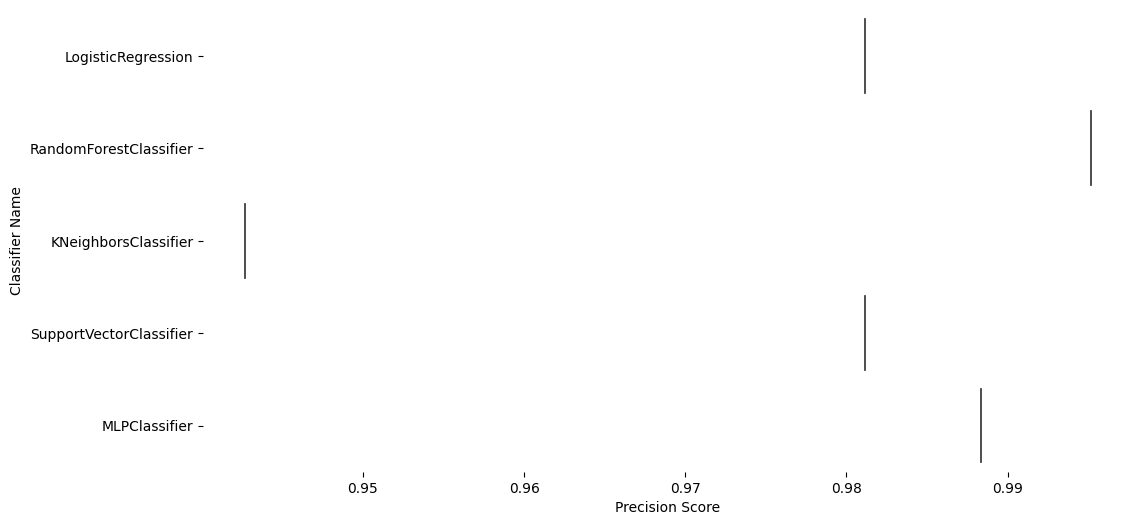

In [30]:
# @title Figure #23: Classifier Name vs Precision Score

# from matplotlib import pyplot as plt
# import seaborn as sns
# figsize = (12, 1.2 * len(summary_df['Classifier Name'].unique()))
# plt.figure(figsize=figsize)
# sns.violinplot(summary_df, x='Precision Score', y='Classifier Name', inner='stick', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)

## RONAK VERSION:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Classifier Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Precision Score', y='Classifier Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

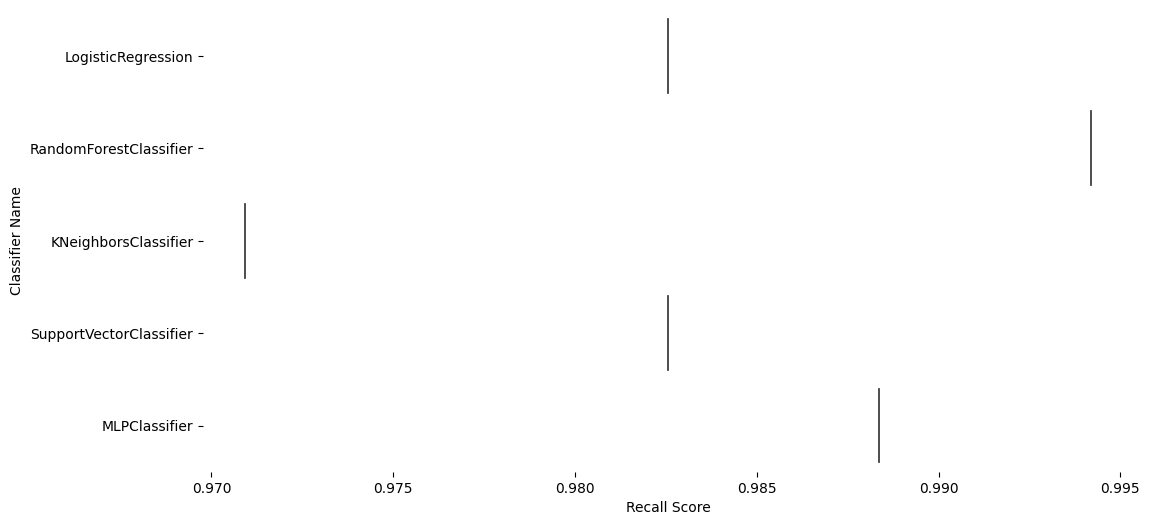

In [31]:
# @title Figure #24: Classifier Name vs Recall Score

# from matplotlib import pyplot as plt
# import seaborn as sns
# figsize = (12, 1.2 * len(summary_df['Classifier Name'].unique()))
# plt.figure(figsize=figsize)
# sns.violinplot(summary_df, x='Recall Score', y='Classifier Name', inner='stick', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)

## RONAK VERSION:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Classifier Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Recall Score', y='Classifier Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

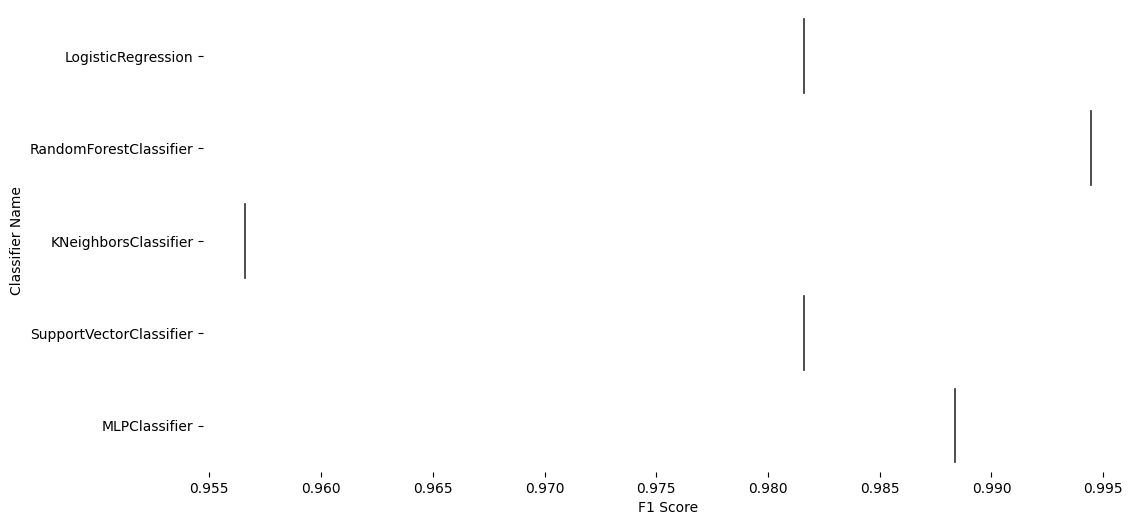

In [32]:
# @title Figure #25: Classifier Name vs F1 Score

# from matplotlib import pyplot as plt
# import seaborn as sns
# figsize = (12, 1.2 * len(summary_df['Classifier Name'].unique()))
# plt.figure(figsize=figsize)
# sns.violinplot(summary_df, x='F1 Score', y='Classifier Name', inner='stick', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)

## Ronak Version
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Classifier Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='F1 Score', y='Classifier Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

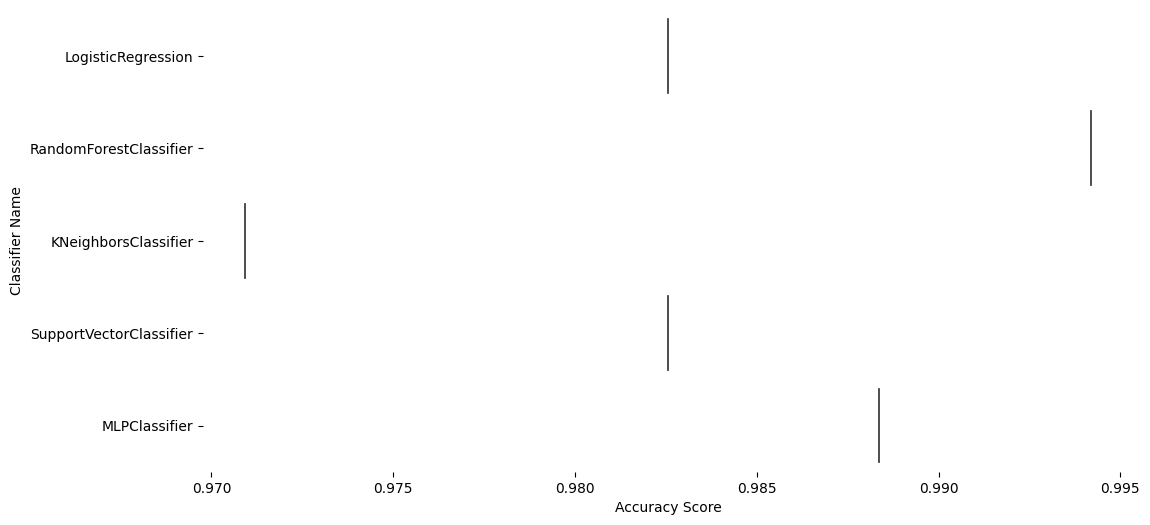

In [33]:
# @title Figure #26: Classifier Name vs Accuracy Score

# from matplotlib import pyplot as plt
# import seaborn as sns
# figsize = (12, 1.2 * len(summary_df['Classifier Name'].unique()))
# plt.figure(figsize=figsize)
# sns.violinplot(summary_df, x='Accuracy Score', y='Classifier Name', inner='stick', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)

## Ronak Version
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Classifier Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Accuracy Score', y='Classifier Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

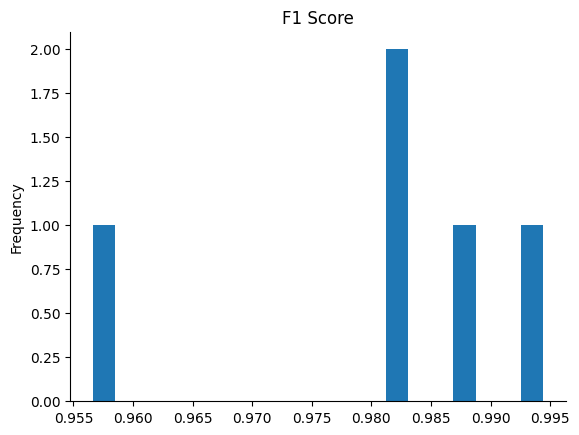

In [34]:
# from matplotlib import pyplot as plt
# summary_df['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
# plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

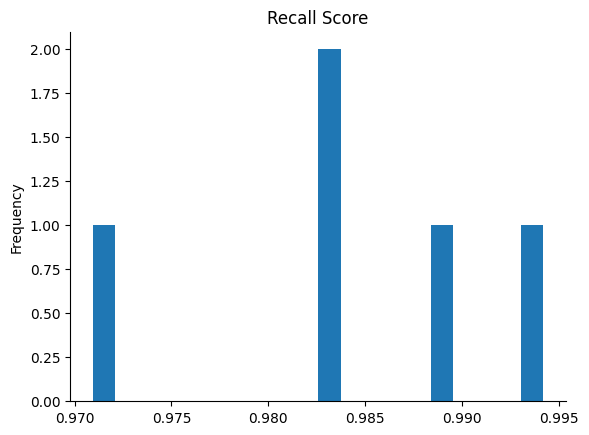

In [35]:
# from matplotlib import pyplot as plt
# summary_df['Recall Score'].plot(kind='hist', bins=20, title='Recall Score')
# plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Recall Score'].plot(kind='hist', bins=20, title='Recall Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

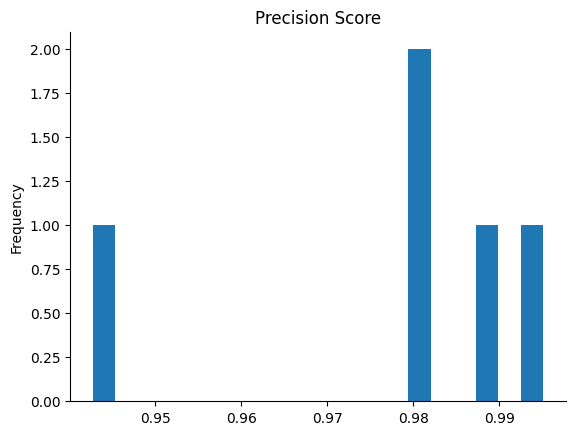

In [36]:
# from matplotlib import pyplot as plt
# summary_df['Precision Score'].plot(kind='hist', bins=20, title='Precision Score')
# plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Precision Score'].plot(kind='hist', bins=20, title='Precision Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

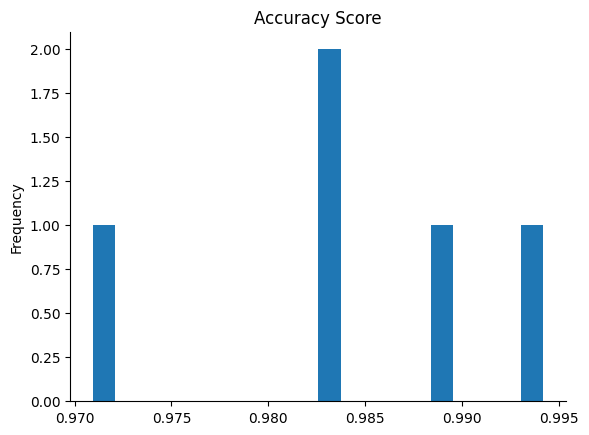

In [37]:
# from matplotlib import pyplot as plt
# summary_df['Accuracy Score'].plot(kind='hist', bins=20, title='Accuracy Score')
# plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Accuracy Score'].plot(kind='hist', bins=20, title='Accuracy Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Results

As requested in the project draft instructions, this is where we finish training our model and share the results.


Metrics Evaluation:
           Classifier Name  Accuracy Score  Precision Score  Recall Score  \
0       LogisticRegression        0.982558         0.981174      0.982558   
1   RandomForestClassifier        0.994186         0.995155      0.994186   
2     KNeighborsClassifier        0.970930         0.942706      0.970930   
3  SupportVectorClassifier        0.982558         0.981174      0.982558   
4            MLPClassifier        0.988372         0.988372      0.988372   

   F1 Score     AUROC    Confusion Matrix  
0  0.981615  0.797006  [[166, 1], [2, 3]]  
1  0.994442  0.997006  [[166, 1], [0, 5]]  
2  0.956610  0.500000  [[167, 0], [5, 0]]  
3  0.981615  0.797006  [[166, 1], [2, 3]]  
4  0.988372  0.897006  [[166, 1], [1, 4]]  


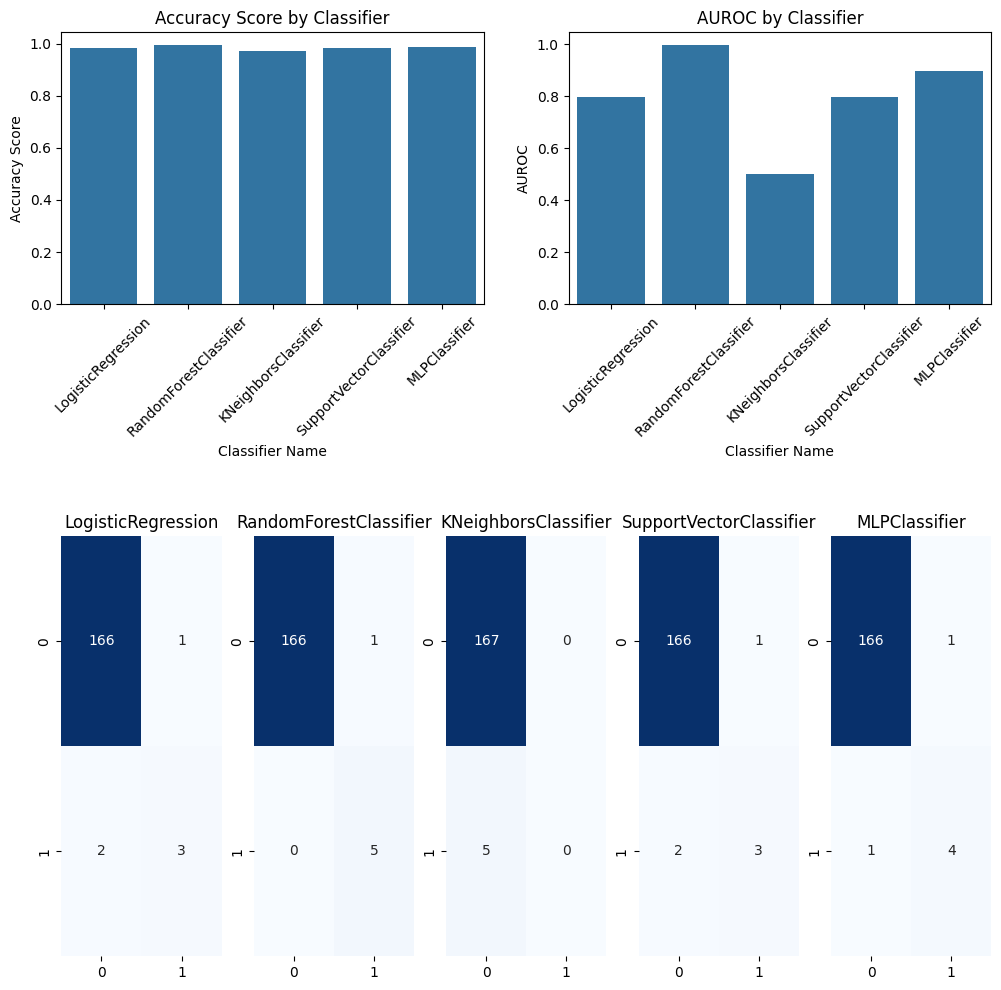

<Figure size 640x480 with 0 Axes>

In [38]:
# @title Figure #31: Model Comparison

# import matplotlib.pyplot as plt
# import seaborn as sns

# print("Metrics Evaluation:")
# print(summary_df)

# plt.figure(figsize=(12, 12))

# plt.subplot(3, 2, 1)
# sns.barplot(x='Classifier Name', y='Accuracy Score', data=summary_df)
# plt.title('Accuracy Score by Classifier')
# plt.xticks(rotation=45)

# plt.subplot(3, 2, 2)
# sns.barplot(x='Classifier Name', y='AUROC', data=summary_df)
# plt.title('AUROC by Classifier')
# plt.xticks(rotation=45)

# plt.subplot(3, 1, 3)
# for i, row in summary_df.iterrows():
#     plt.subplot(3, len(summary_df), i + 1 + len(summary_df)*2)
#     sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.title(f"{row['Classifier Name']}")
#     plt.tight_layout()

# plt.show()

# summary_df.to_csv('/content/gdrive/My Drive/CS598-Data/model_results.csv', index=False)
# plt.savefig('/content/gdrive/My Drive/CS598-Data/model_performance.png')



# Print metrics evaluation results
print("Metrics Evaluation:")
print(results)

# Create figure with specific size
plt.figure(figsize=(12, 12))

# Plot accuracy score by classifier
plt.subplot(3, 2, 1)
sns.barplot(x='Classifier Name', y='Accuracy Score', data=results)
plt.title('Accuracy Score by Classifier')
plt.xticks(rotation=45)

# Plot AUROC by classifier
plt.subplot(3, 2, 2)
sns.barplot(x='Classifier Name', y='AUROC', data=results)
plt.title('AUROC by Classifier')
plt.xticks(rotation=45)

# Plot confusion matrices
plt.subplot(2, 1, 2)
for i, row in results.iterrows():
    plt.subplot(2, len(results), i + 1 + len(results))
    sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{row['Classifier Name']}")
    plt.tight_layout()

# Show plots
plt.show()

# Save results to CSV
results.to_csv('/content/gdrive/My Drive/CS598-Data/model_results.csv', index=False)

# Save performance plot as image
plt.savefig('/content/gdrive/My Drive/CS598-Data/model_performance.png')

## Results Analysis

Note: our results differ slightly from the main paper. This is likely due to differences in choice of hyperparameters and split method. We will explore this in our final project submission.

## Further Context / Motivation

The prognosis for cervical cancer varies significantly depending on the stage of cancer at diagnosis. The five-year survival rate for early-stage detection patients is around 92%. This rate drops dramatically to 58% when the cancer has spread to regional lymph nodes and further to 18% if it's metastasized to distant parts of the body (Ayad). The high performance of classification models for cervical cancer is clinically valuable - potentially facilitating earlier and more accurate diagnoses that could improve survival rates.

### Precision Results

This is the accuracy of positive predictions made by our models (aka the likelihood that patients diagnosed with cervical cancer have the disease). We notice that Logistic Regression and the Support Vector Classifer perform well with a precision score of around 98%. We also found an equally strong metric for KNNs. While high precision reduces the risk of false positives, it is not good to have false positive diagnoses (thinking holistically about patient care and misdiagnosis). It would cause undue stress and potentially delay the identification of other underlying conditions.

## Recall

Recall is critical in medical diagnosis - especially for conditions like cervical cancer where early detection is vital. This is the ability of a model to correctly identify all actual cases of disease from the data. In our case, most of the models do a fairly good job - with MLP and Random Forest doing the best (and Logistic Regresssion / SVM coming a close second). The high recall rate is important because the consequences of a false negative (i.e., missing an actual case) are extremely dire (versus a false positive). Undiagnosed patients are at risk for live-saving treatment due to early detection.

## F1 Score

The F1 score is the balance between precision and recall. An optimal F1 score indiciates the model performs well across dimensions. We find that MLP and Random Forest perform the best (with Logistic Regression and SVM coming a close second). This means that those models do a good job of identifying cervical cancer cases accurately but also minimizing false positives / negatives.

## Accuracy

Accuracy measures the overall correctness of the model across all predictions (true positives, true negatives, false positives, false negatives). In our case, accuracy was fairly high for all models; however, MLP and Random Forest were the highest with Logistic Regression and SVM coming very closely behind. The high level of accuracy shows that the model is effective in identifying positive/negative instances corectly.

## AUROC

AUROC represents the degree or measure of seperability (in plain english, it's how much the model is capable of distinguishing between classes). The higher the AUROC, the better the model can predict the classes as what they are where 1 is perfect and 0.5 is random guessing. In our case, a high AUROC is desirable - it implies the model does well with identifying who could benefit from further cancer testing/treatement and minimizing the number of false alarms. Based on our current data, MLP and Random Forest have the highest AUROC scores, with Logistic Regression and SVM coming in close second.

## Ablations / XAI / Local Explanations

As mentioned below, this section is something we will focus more on in the final project draft/etc. Given the long time it takes to run the code (i.e., just to run KSHAP, it took more than 10 minutes), we do not include code snippets in this Jupyter notebook, but rather an explanation of our preliminary test and how we plan to go about this work in the final project.

This part of the paper is about understanding feature importance (i.e., contributions to predictions, either globally or locally). The way we go about this is by adding random noise/variables to the dataset to test robustness (Bernoulli for binary variables, Gaussian to add normally distributed data for numeric feature addition, and Gaussian noise to simulate measurement error). These additions are added to the risk factor dataframe used in training the models. Then, to understand the contribution of each feature to a model's prediction, we will use local explanation methods and then visualize this information. Here are the methods we are considering:

- (1) Local Surrogates: simpler models that approximate the predictions of a complex model within a specific local region of the input space.
- (2) KSHAP (kernel SHAP) provides a measure of the importance of each feature in a prediction - attributing model output to inputs by using a specially weighted linear regression to get SHAP values (Shapley additive explanations).
- (3) SSHAP (sampling SHAP) provides a sampling-based approach to get SHAP values - which is useful when exact SHAP computation is computationally expensive / impractical. It samples "perturbations" in input feature values and observes impact on the output.
- (4) LIME (local interpretable model-agnostic explanations) helps explain the predictions of any classifier by perturbing data around a given instance and fitting a simpler model to the perturbation reuslts (identifying which features contribute most to complex model decisions).
- (5) DICE (diverse counterfactual explanations) generates counterfactual model explanations by showing how altering some feature values could change the prediction to a desired output (i.e., model decision boundaries).

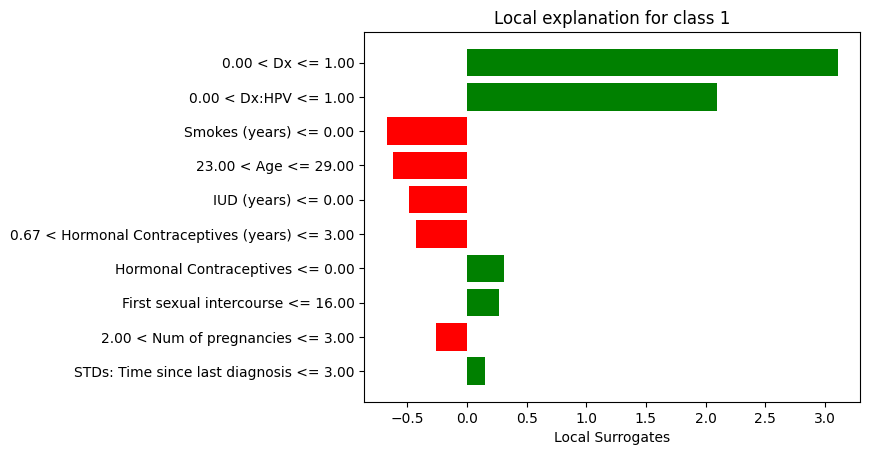

In [39]:
# Define directory to workspace and data
img_dir = '/content/gdrive/My Drive/CS598-Data/Reference Images/Figure_32.png'

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image, HTML

img = cv2.imread(img_dir)
if img is not None:
    display(HTML("<style> .title {color: red; font-family: Arial, sans-serif; font-size: 20px;}</style><div class='title'>Figure #32</div>"))
    cv2_imshow(img)
else:
    print("Failed to load image. Please check the image path.")


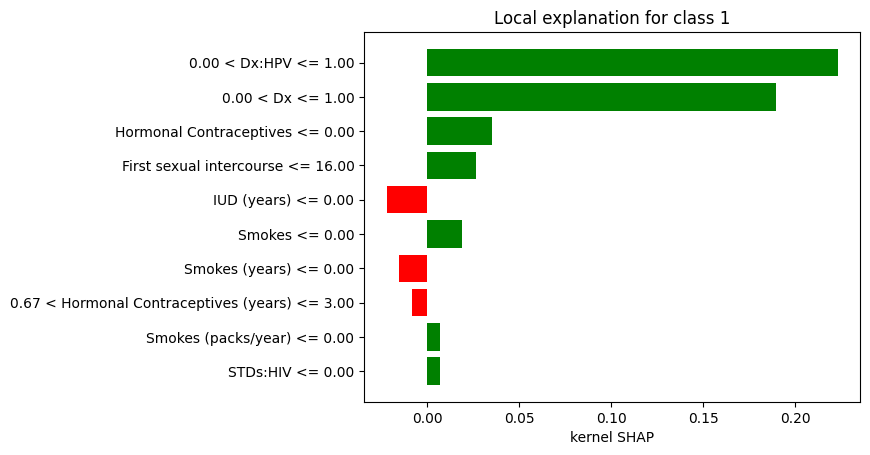

In [40]:
# Define directory to workspace and data
img_dir = '/content/gdrive/My Drive/CS598-Data/Reference Images/Figure_33.png'

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image, HTML

img = cv2.imread(img_dir)
if img is not None:
    display(HTML("<style> .title {color: red; font-family: Arial, sans-serif; font-size: 20px;}</style><div class='title'>Figure #33</div>"))
    cv2_imshow(img)
else:
    print("Failed to load image. Please check the image path.")


When running the code to identify some of the above, we will end up with a figure like Figure #32 above. Green bars are positive values, which show features that contribute towards class #1 whereas features with red bars show features that contribute against predicting class #1 (i.e., cancer). A larger absolute value indicates stronger impact on the model's output. So one way to interpret the data here is that hormonal contraceptive use for 2/3 year to 3 years, sexual intercourse, and HPV prevalence are strongest contributors to cervical cancer risk. This is also validated by KSHAP in Figure #33 above. When we do our final paper, we will pick at least two explanation methods and analyze them like we have above (ex., we can include LIME, SSHAP, and DICE results).

After doing the above, we will likely reproduce the "ROAR" (remove and restrain) section in the paper, which evaluates the impact of feature importance rankings on model predictive performance. In other words, we can understand how classifier accuracy is impacted as more features (deemed important by each method like KSHAP, Local Surrogates, etc.) are removed - essentially validating their results. We end up with a graph like below (Figure #34).

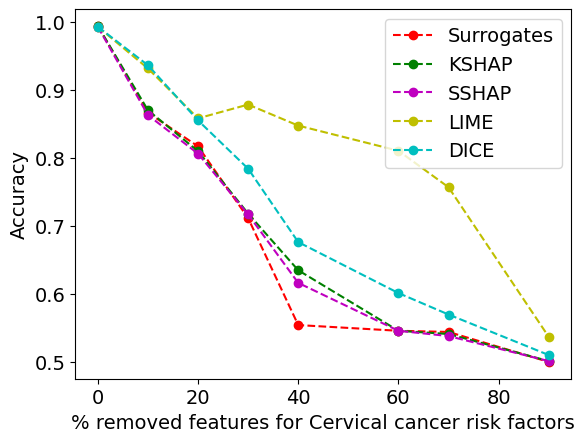

In [41]:
# Define directory to workspace and data
img_dir = '/content/gdrive/My Drive/CS598-Data/Reference Images/Figure_34.png'

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image, HTML

img = cv2.imread(img_dir)
if img is not None:
    display(HTML("<style> .title {color: red; font-family: Arial, sans-serif; font-size: 20px;}</style><div class='title'>Figure #34</div>"))
    cv2_imshow(img)
else:
    print("Failed to load image. Please check the image path.")


Then, after doing the above, we further work on interpreting our model results (i.e., continuing our replication of the paper's methods). We plan to follow the SHAPASH installation/set-up, which looks like the following:

- (1) Install the shapash Python library and set-up the `SmartExplainer` object with models/data, which helps with explanation generation.
- (2) Use `SmartExplainer` to generate contribution plots (shows how each feature contributes to the prediction of a single instance) for the model's predictions. For each set of feature contributions, the code generates a plot for the first instance ond we save that image for reference.
- (3) Compute the conistency of the different explainability methods using the `Consistency` class from the SHAPASH library. We then deliver a consistency matrix (shown in Figure #35) which shows how similar/different the feature importance rankings are between different methods.
- (4) We then do a "compactness" measure - which tests the compactness of feature contributions (i.e., how many top features are needed to achieve a certain level of model output approximation). We plan to visualize these results in the final paper/project.
- (5) Next, we implement a custom stability analysis tool that measure the SHAP local stability which gets distances between instances using normalized L1 distance, identifies close neighbors of an instance in feature space, and evaluates how SHAP values vary among these neighbors and shows the "local stability" of the explanation. We then generate distribution plots for the SHAP values of each feature across the different explainability methods. We do this for one instance and then for multiple instances; an example is shown in Figure #36 below.
- (6) Finally, we will plot heatmaps of the feature / rank agreement to illustrate the average agreement across all methods and between specific groups of methods.

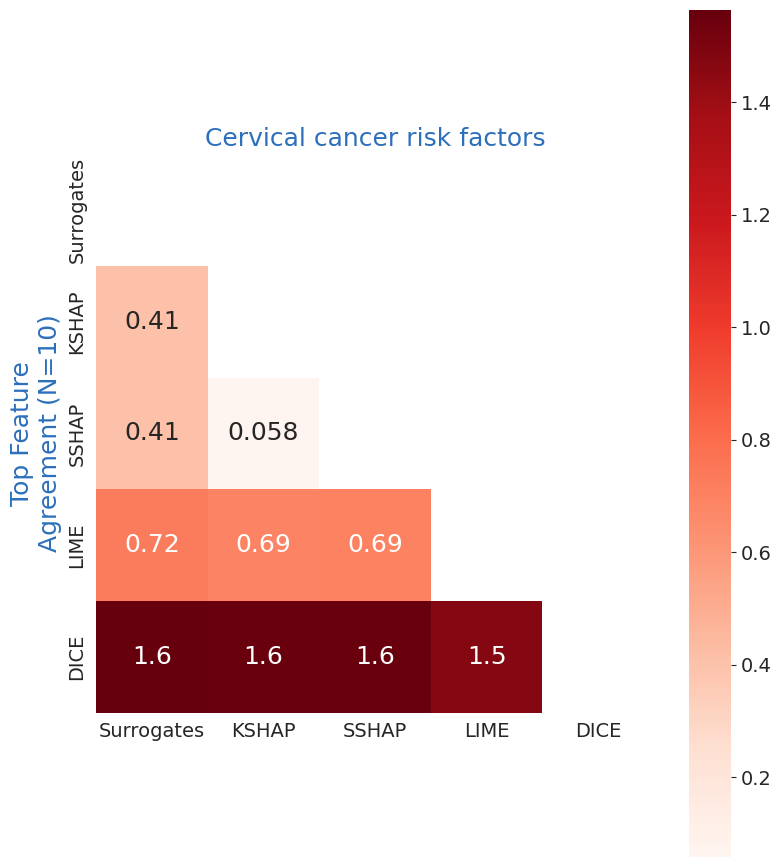

In [42]:
# Define directory to workspace and data
img_dir = '/content/gdrive/My Drive/CS598-Data/Reference Images/Figure_35.png'

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image, HTML

img = cv2.imread(img_dir)
if img is not None:
    display(HTML("<style> .title {color: red; font-family: Arial, sans-serif; font-size: 20px;}</style><div class='title'>Figure #35</div>"))
    cv2_imshow(img)
else:
    print("Failed to load image. Please check the image path.")

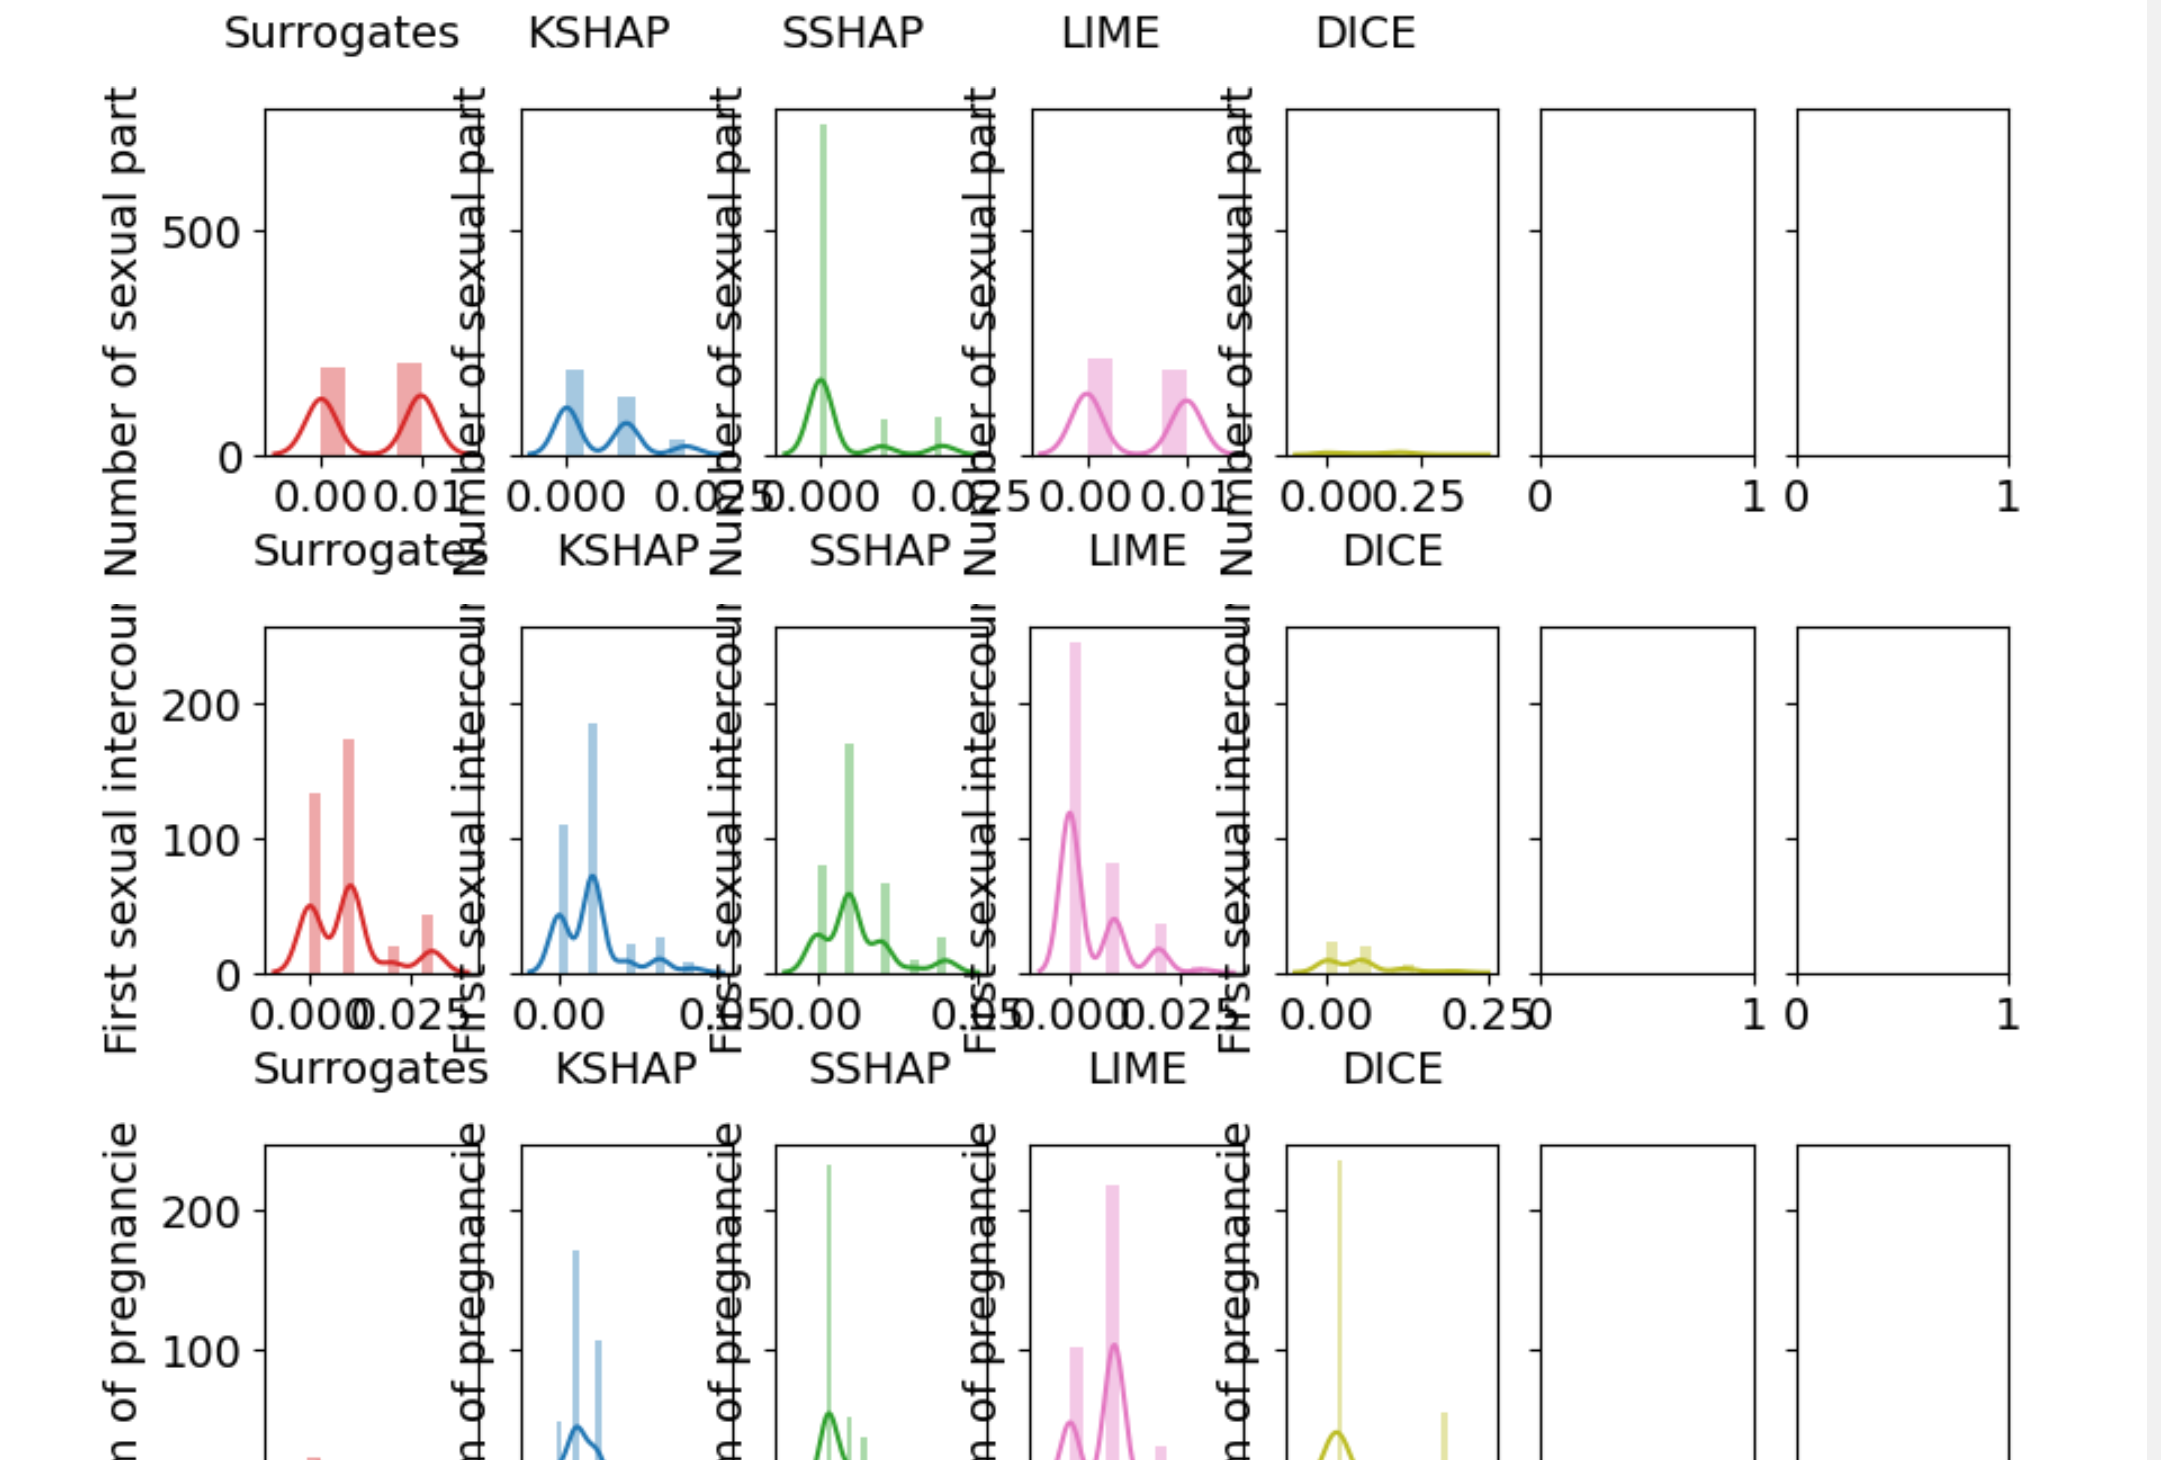

In [43]:
# Define directory to workspace and data
img_dir = '/content/gdrive/My Drive/CS598-Data/Reference Images/Figure_36.PNG'

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image, HTML

img = cv2.imread(img_dir)
if img is not None:
    display(HTML("<style> .title {color: red; font-family: Arial, sans-serif; font-size: 20px;}</style><div class='title'>Figure #36</div>"))
    cv2_imshow(img)
else:
    print("Failed to load image. Please check the image path.")

# Discussion

From the project draft instructions:
  * Make assessment that the paper is reproducible or not.
    - For the most part, we are able to reproduce the paper.
  * Explain why it is not reproducible if your results are kind negative.
    - N/A.
  * Describe “What was easy” and “What was difficult” during the reproduction.
    - For the most part, the implementation was straightforward. The codebase on Kaggle provided clear implementation details and we are referencing Github code that was already run on Jupyter Notebook orginally. We also found success due to the brevity of the input data and images/figures that we could reference to ensure that we were doing our code correctly.
    - In terms of difficulty, we are missing a few bits of data/etc. from the original codebase (namely, cancer.csv, which is referenced but not available on Kaggle or the original codebase for the Ablation part). This makes it challenging to replicate accurately the Ablation / XAI section of the code. Some pieces of Python code in the Jupyter notebook do not function. Additionally, we had to tweak our data preprocessing steps slightly to accomodate some changes in the way that functions handle the data for processing and visualization (i.e., instead of "label," we had to be more explicit "Dx:Cancer").
  * Make suggestions to the author or other reproducers on how to improve the reproducibility.
    - Providing all the code (i.e., "cancer.csv") referenced would be helpful. Additionally, including the original codebase and reference images in the Github would be great.
    - There are artefacts of testing (i.e., a stray 'y_train' in the original github .ipynb file) that could be removed for ease of replication/use.
    - Some parts of the code do not run / function (i.e., # nn_clf.score(X_train, y_train)) - these should be examined/removed/modified as needed.
  * What will you do in next phase.
    - We will reproduce better the code for the XAI portion. We will write detailed explanations on what each step of our code does as well as explanations for the XAI part and their analysis.
    - We will examine the slight discrepancy between our results and that of the paper for the model (< 0.01%), which is likely due to the way we handled hyperparameter tuning.



# References

1. Paria, Renado. “Cervical Cancer Classification 99.4% Recall.” Kaggle, Kaggle, 24 July 2022, www.kaggle.com/code/renadope/cervical-cancer-classification-99-4-recall.

2. Ayad, Célia Wafa. “A Critical-Evaluation of Local Explanations for Assessing Cervical Cancer Risk Factors.” GitHub, École polytechnique, 2 Aug. 2023, github.com/cwayad/Local-Explanations-for-Cervical-Cancer/blob/main/MLHC_cervical_cancer_classification.ipynb.

3. Fernandes,Kelwin, Cardoso,Jaime, and Fernandes,Jessica. (2017). Cervical Cancer (Risk Factors). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z310.

4. Gokagglers. “Cervical Cancer Risk Classification.” Kaggle, 31 Aug. 2017,  www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification/data.

5. “Cervical Cancer.” Mayo Clinic, Mayo Foundation for Medical Education and Research, 2 Sept. 2023, www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501#:~:text=Cervical%20cancer%20is%20a%20type,in%20causing%20most%20cervical%20cancer.


